In [1]:
# from google.colab import files
# uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [110]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np

In [111]:
# Read the data from the CSV file with read from Numpy
data = np.loadtxt("Salary_dataset.csv", delimiter=",", dtype=str)

print(data)

[['' 'YearsExperience' 'Salary']
 ['0' '1.2000000000000002' '39344.0']
 ['1' '1.4000000000000001' '46206.0']
 ['2' '1.6' '37732.0']
 ['3' '2.1' '43526.0']
 ['4' '2.3000000000000003' '39892.0']
 ['5' '3.0' '56643.0']
 ['6' '3.1' '60151.0']
 ['7' '3.3000000000000003' '54446.0']
 ['8' '3.3000000000000003' '64446.0']
 ['9' '3.8000000000000003' '57190.0']
 ['10' '4.0' '63219.0']
 ['11' '4.1' '55795.0']
 ['12' '4.1' '56958.0']
 ['13' '4.199999999999999' '57082.0']
 ['14' '4.6' '61112.0']
 ['15' '5.0' '67939.0']
 ['16' '5.199999999999999' '66030.0']
 ['17' '5.3999999999999995' '83089.0']
 ['18' '6.0' '81364.0']
 ['19' '6.1' '93941.0']
 ['20' '6.8999999999999995' '91739.0']
 ['21' '7.199999999999999' '98274.0']
 ['22' '8.0' '101303.0']
 ['23' '8.299999999999999' '113813.0']
 ['24' '8.799999999999999' '109432.0']
 ['25' '9.1' '105583.0']
 ['26' '9.6' '116970.0']
 ['27' '9.7' '112636.0']
 ['28' '10.4' '122392.0']
 ['29' '10.6' '121873.0']]


In [112]:
# drop column name
data = data[1:, :]
data = data.astype(float)
# data[:, -1] = data[:, -1].astype(float)
# Separate the features (YearsExperience) from the target variable (Salary)
X = data[:, 1]
y = data[:, -1]
# only last column. first parameter means 'all elements on dimension one', second element selects/slices dimension 2

print(X)
print(y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [113]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt

#You have to reproduce this graph

In [115]:
# Let's create a function that displays the point line with the bar.
# def predict(X, theta):
#   return theta[1] * X + theta[0]
# theta[0] = y-intercept or b
# theta[1] = slope or m

def equation_of_line(m, x, b):
  return (m * x) + b

def visualize(theta, X, y):
  plt.scatter(X, y)
  y_pred = equation_of_line(theta[1], X, theta[0])
  plt.plot(X, y_pred)
  plt.show()

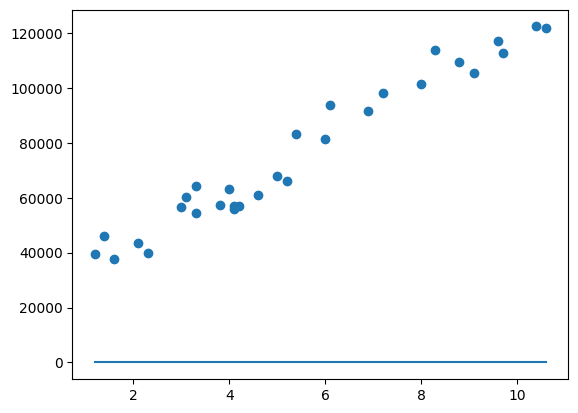

In [116]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = [0, 0]
visualize(theta, X, y)

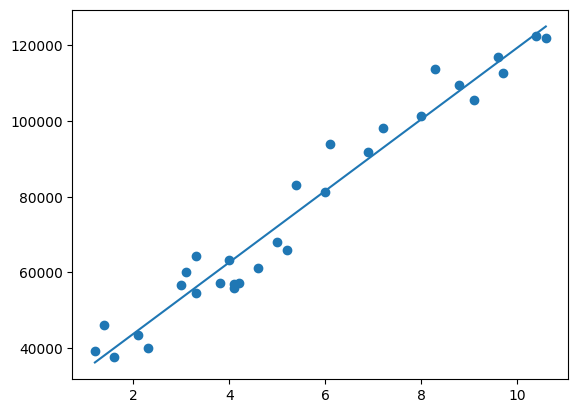

slope: 9449.962321455077
intercept: 24848.203966523193


In [123]:
# this is the ordinary least squares solution, it solves it without iteration
#, but not valid for this exercise

def covariance(a, b):
  return np.sum((a - np.mean(a)) * (b - np.mean(b)))

def slope(x, y):
  return covariance(x, y) / covariance(x, x)

def intercept(x, y):
  return np.mean(y) - slope(x, y) * np.mean(x)

# ordinary least squares formula
theta = [intercept(X, y), slope(X, y)]

visualize(theta, X, y)

# reset theta to be safe
theta = np.zeros(2)

print("slope:", slope(X, y))
print("intercept:", intercept(X, y))

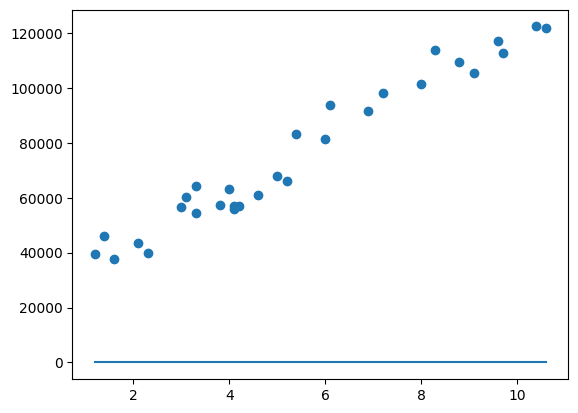

In [125]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
  # can replace with:
  # weird choice of variables names to just say "y = mx + b"
  # y = slope times X plus y-intercept
  return theta[1] * X + theta[0]

# predict(X, [intercept(X, y), slope(X, y)])
theta = [0, 0]
visualize(theta, X, y)

In [128]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    xlen = X.shape[0]

    # Loop over the number of iterations
    for i in range(num_iters):
      # calculate loss
      y_pred = predict(X, theta)
      residual = y - y_pred

      # Perform one iteration of gradient descent (i.e., update theta once)
      slope_gradient = (2/xlen) * np.sum(residual * X)
      intercept_gradient = (2/xlen) * np.sum(residual)

      theta[1] += alpha * slope_gradient
      theta[0] += alpha * intercept_gradient

    return theta

In [130]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[24474.55756611  9504.80132196]


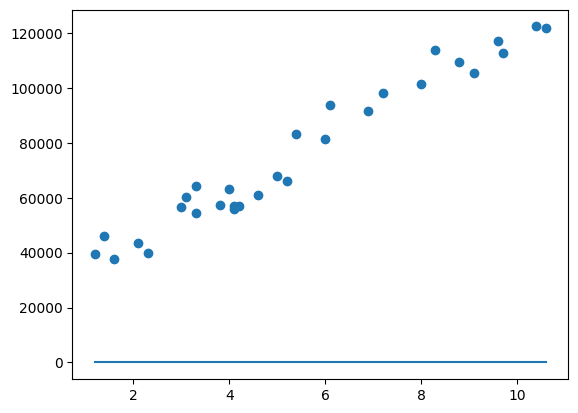

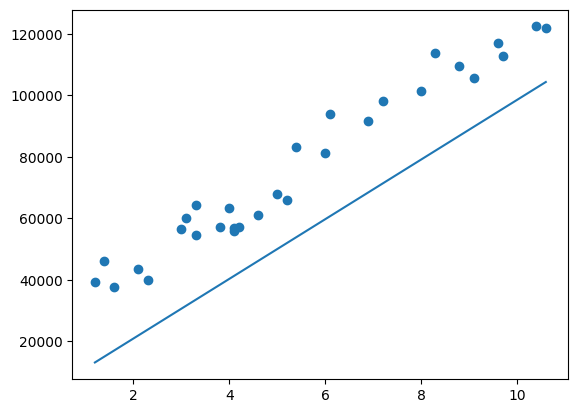

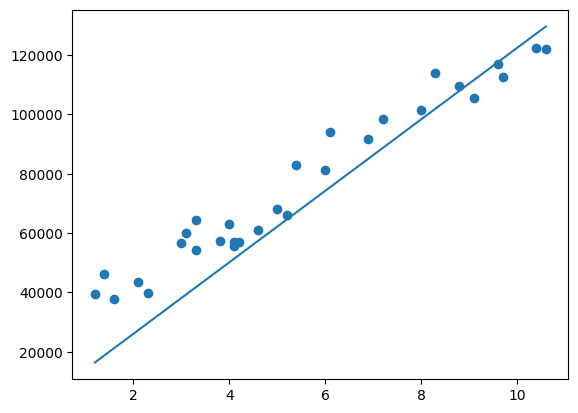

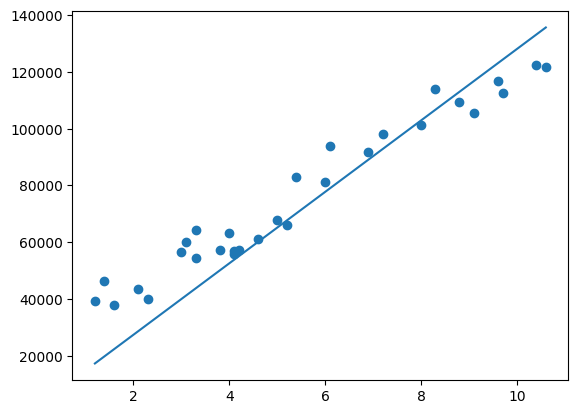

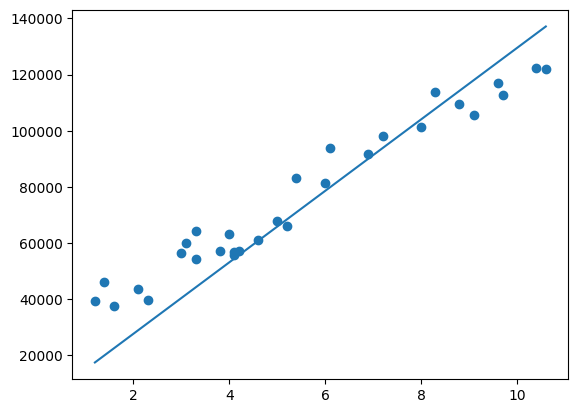

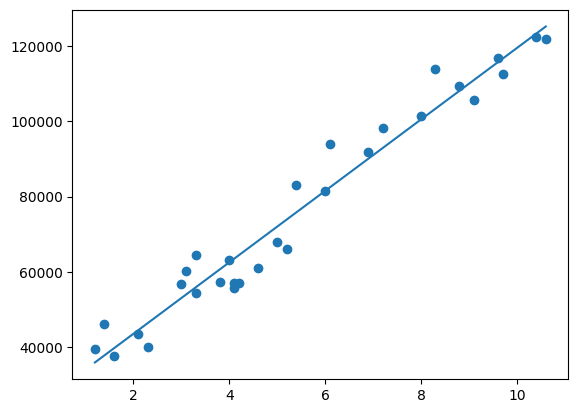

In [132]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = [0, 0]
visualize(fit(X, y, theta, 0.01, 0), X, y)
theta = [0, 0]
visualize(fit(X, y, theta, 0.01, 1), X, y)
theta = [0, 0]
visualize(fit(X, y, theta, 0.01, 2), X, y)
theta = [0, 0]
visualize(fit(X, y, theta, 0.01, 3), X, y)
theta = [0, 0]
visualize(fit(X, y, theta, 0.01, 4), X, y)
theta = [0, 0]
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [133]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    y_pred = predict(X, theta)
    residual = y - y_pred
    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    squared_sum_loss = np.sum(residual ** 2)
    cost = squared_sum_loss / (2 * len(X))

    return cost

In [134]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [135]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        y_pred = predict(X, theta)
        residual = y - y_pred

        # Update the temporary values of theta for both coefficients using the gradient descent formula
        slope_gradient = (2/m) * np.sum(residual * X)
        intercept_gradient = (2/m) * np.sum(residual)


        # Update the theta values
        theta[1] += alpha * slope_gradient
        theta[0] += alpha * intercept_gradient

        # Calculate and append the cost for the current theta values to the history list
        J_history.append(cost(X, y, theta))

        # Perform one iteration of gradient descent (update theta values)

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [136]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

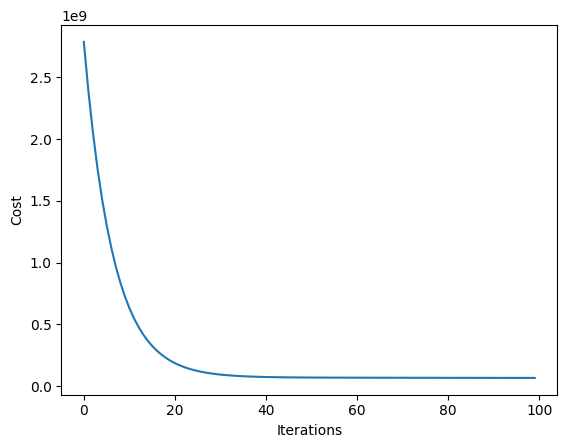

In [137]:
#You have to reproduce this graph
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [141]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 10 years of experience 129606.78603782502
